# 06wk-023: 취업+각종영어점수, Ridge

최규빈  
2023-10-05

# 1. 강의영상

# 2. Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import sklearn.linear_model

# 3. Data

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2023/main/posts/employment_multicollinearity.csv")
np.random.seed(43052)
df['employment_score'] = df.gpa * 1.0 + df.toeic* 1/100 + np.random.randn(500)

In [3]:
df

# 4. True

`-` 신이라면 (=데이터가 만들어진 비밀을 알고 있다면) 아래와 같이 했을 것

In [12]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


`-` 평가

In [23]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     0.9133
test_score:  0.9127

# 5. Baseline

`-` 모든 변수를 활용하여 회귀모형으로 적합 $\to$ 최악의 결과

In [24]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression()
## step3
predictr.fit(X,y)
## step4 : pass 


`-` 평가

In [25]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1171

# 6. Ridge

`-` 통계학자에게 자문: 이럴 경우 Ridge를 사용하면 됩니다..

In [30]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1) # predictr = sklearn.linear_model.Ridge() 와 결과가 같다. 
## step3
predictr.fit(X,y)
## step4 : pass 


`-` 평가: Ridge 안 되는데요, 교수님..

In [31]:
print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1173

`-` 하이퍼 파라메터 튜닝 $\alpha=1.5$

In [36]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1.5) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1174

-   좋아졌다?

`-` 하이퍼 파라메터 튜닝 $\alpha=5e8$

In [49]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=5e8) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     0.7507
test_score:  0.7438

`-` 오라클에 비할바는 아니긴한데 공선성이 있는 경우라도 Ridge에서 적절한
alpha를 고른다면 망하는 모형을 만들진 않음

# 7. Ridge는 왜 결과를 좋게 만들까?

## A. 정확한 설명

`-` SVD를 이용하여 이론적인 계산하면
`sklearn.linear_model.LinearRegression()`로 적합한 결과보다
`sklearn.linear_model.Ridge()`로 적합한 결과를 더 좋게 만드는 $\alpha$가
항상 존재함을 증명할 수 있음.

## B. 직관적 설명 (엄밀하지 않은 설명)

### `Step1:` LinearRegression은 왜 망했는가?

`-` 토익의 계수는 실제로 $\frac{1}{100}$이다. 적딩히

-   `toeic` + … + `toeic499` $\approx$ 0.01 이라면

대충 맞는 답이다.

In [101]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.LinearRegression() 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     1.0000
test_score:  0.1171

In [102]:
predictr.coef_.reshape(-1)[1:].sum()

`-` 그런데 사실 저 `0.01`이라는 값은 몇개의 계수만 있어도 만들 수 있다.

In [104]:
predictr.coef_.reshape(-1)[[4,5]].sum()

`-` 이런논리로 치면 4,5에 해당하는 계수 (즉 `toeic2`, `toeic3`에
해당하는 계수) 만 있다면 사실 $y$를 설명하는데 충분했고, 나머지는
불필요한 특징이 된다. (그리고 불필요한 특징은 오버피팅을 유발한다)

### `Step2:` Ridge의 아이디어

`-` Ridge의 아이디어: `toeic2`, `toeic3` 와 같이 몇개의 변수로만
`0.01`이라는 수를 설명할 수 없도록 “강제”하자. 즉 몇개의 변수로만
`0.01`이라는 수를 설명할 수 없도록 “패널티”를 주자.

`-` 패널티: 유사토익들의 계수값을 제곱한뒤 합치고(=$l_2$-norm을 구하고),
그 값이 0에서 떨어져 있을 수록 패널티를 줄꺼야!

-   그렇다면..? 0.01을 그냥 엔빵[1]해서 설명하면 되지않나?

`-` 패널티를 주는 정도? $\alpha$로 조절함.. $\alpha$를 크게 할수록
패널티를 많이줌

## C. $\alpha$에 따른 계수값 변화

`-` 여러개의 predictor 학습

[1] 용어 죄송합니다.. $\frac{1}{n}$이라고하기 좀 그래서요, 정확하게는
$\frac{1}{p}$ 아닐까 해서요

In [123]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
# step2: 여러개의 predictor 생성 
alphas = [5e2, 5e3, 5e4, 5e5, 5e6, 5e7, 5e8]
predictrs = [sklearn.linear_model.Ridge(alpha=alpha) for alpha in alphas]
# step3: fit 
for predictr in predictrs:
    predictr.fit(X,y)

`-` 계수값 시각화

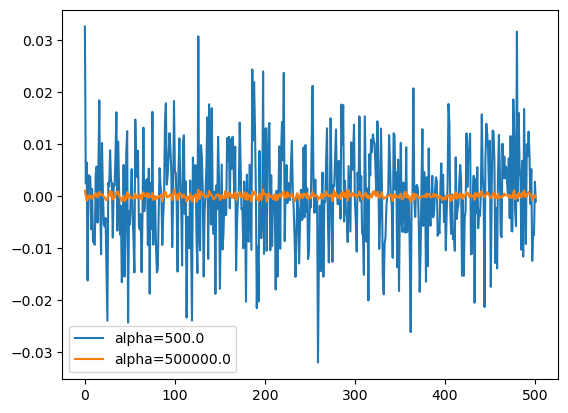

In [146]:
plt.plot(predictrs[0].coef_.reshape(-1),label=f'alpha={predictrs[0].alpha}')
plt.plot(predictrs[3].coef_.reshape(-1),label=f'alpha={predictrs[3].alpha}')
plt.legend()

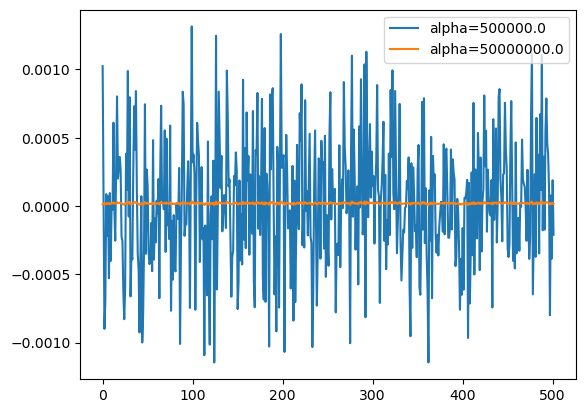

In [148]:
plt.plot(predictrs[3].coef_.reshape(-1),label=f'alpha={predictrs[3].alpha}')
plt.plot(predictrs[5].coef_.reshape(-1),label=f'alpha={predictrs[5].alpha}')
plt.legend()

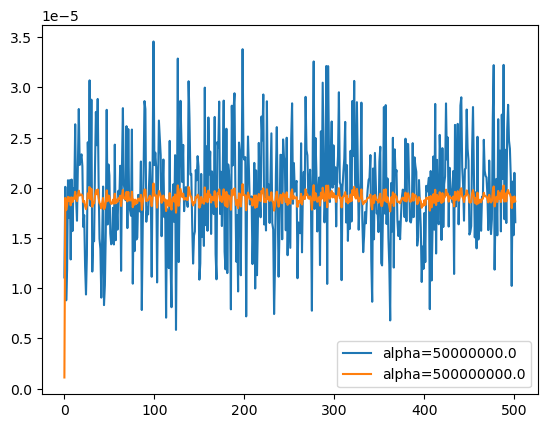

In [149]:
plt.plot(predictrs[5].coef_.reshape(-1),label=f'alpha={predictrs[5].alpha}')
plt.plot(predictrs[-1].coef_.reshape(-1),label=f'alpha={predictrs[-1].alpha}')
plt.legend()

`-` 직관: 마지막 predictor의 계수값을 살펴보자.

In [159]:
predictrs[-1].coef_.reshape(-1)

-   불필요한 변수가 나올수 없는 구조임. (한 두개로 전체를 설명할 수
    없음)
-   모든 변수는 대략 2e-5($\approx \frac{1}{100}\frac{1}{501}$) 만큼의
    가치가 있음. 여기에서 1/100은 원래 토익의 계수, 501이라는 숫자는
    (토익+유사토익)점수를 의미하는 변수의 숫자
-   고급: 살짝 1/(100\*501)보다 전체적으로 값이 작아보이는건 기분탓은
    아님 (Ridge의 특징)

In [161]:
1/(100*501)

## D. $\alpha$에 따른 실험내용 정리

In [162]:
sum(predictrs[0].coef_.reshape(-1)**2)

In [163]:
predictrs[0].score(XX,yy)

In [193]:
for predictr in predictrs:
    print(f'alpha={predictr.alpha:.1e}\t'
          f'panalty={sum(predictr.coef_.reshape(-1)**2):.3f}\t'
          f'toeic_coefs.sum()={sum(predictr.coef_.reshape(-1)[1:]):.4f} \t'
          f'test_score={predictr.score(XX,yy):.2f}')

alpha=5.0e+02   panalty=0.047   toeic_coefs.sum()=0.0103    test_score=0.20
alpha=5.0e+03   panalty=0.022   toeic_coefs.sum()=0.0102    test_score=0.46
alpha=5.0e+04   panalty=0.003   toeic_coefs.sum()=0.0099    test_score=0.69
alpha=5.0e+05   panalty=0.000   toeic_coefs.sum()=0.0099    test_score=0.74
alpha=5.0e+06   panalty=0.000   toeic_coefs.sum()=0.0099    test_score=0.74
alpha=5.0e+07   panalty=0.000   toeic_coefs.sum()=0.0098    test_score=0.75
alpha=5.0e+08   panalty=0.000   toeic_coefs.sum()=0.0095    test_score=0.74

## E. $\alpha$가 크다고 무조건 좋은건 아니다.

In [10]:
## step1 
df_train, df_test = sklearn.model_selection.train_test_split(df,test_size=0.3,random_state=42)
X = df_train.loc[:,'gpa':'toeic499']
y = df_train[['employment_score']]
XX = df_test.loc[:,'gpa':'toeic499']
yy = df_test[['employment_score']]
## step2 
predictr = sklearn.linear_model.Ridge(alpha=1e12) 
## step3
predictr.fit(X,y)
## step4 : pass 

#---#

print(f'train_score:\t {predictr.score(X,y):.4f}')
print(f'test_score:\t {predictr.score(XX,yy):.4f}')

train_score:     0.0191
test_score:  0.0140

In [17]:
predictr.coef_[0][1:].sum() # 걍 사이좋게 0.. alpha가 커질수록 0.01에서 점점 줄어드는건 기분탓이 아니었어..